<h1>Homework 1</h1>

<h2>Peter Dyer</h2>

In [93]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from collections import Counter

In [94]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [95]:
#import numpy as np

#class KNN
#implement the kNN algorithm
class knn:
    
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]   
        return np.array(predicted_labels)
                            
    def _predict(self, x):
        #compute euclidaen distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        #get k-nearest samples
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        #vote on most common label
        most_common = Counter(k_nearest_labels).most_common(1)
        #tie breaking? default mode is favor first
        return most_common[0][0]

In [96]:
#from knn import KNN

In [97]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

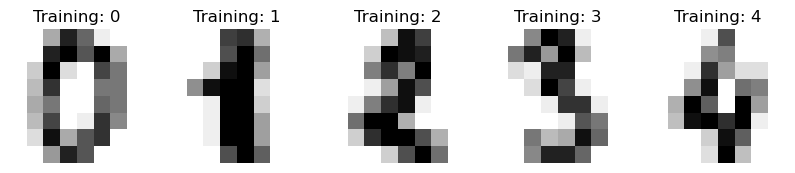

In [98]:
#load dataset
digits = datasets.load_digits()

#preview data
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [99]:
#flatten 8x8 images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
#X, y = data, digits.target

In [100]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [101]:
clf = KNN(k=3)

In [102]:
clf.fit(X_train, y_train)

In [103]:
predictions = clf.predict(X_test)

In [104]:
acc_k3 = np.sum(predictions == y_test)/ len(y_test)
print(acc_k3)

0.9588431590656284


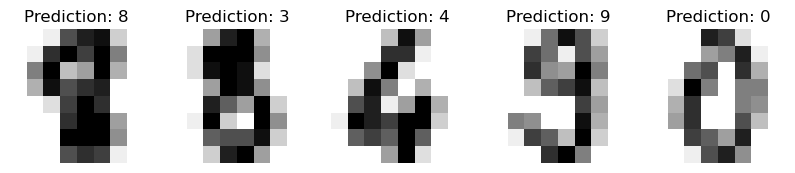

In [105]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [106]:
print(f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Classification report for classifier <__main__.KNN object at 0x000001EBAD25CFA0>:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.97      0.97        91
           2       0.98      0.94      0.96        86
           3       0.90      0.91      0.91        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.98      0.99      0.98        89
           8       0.93      0.95      0.94        88
           9       0.90      0.93      0.91        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  1 83  0  1  0  2  2  2]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  2  0  2  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]


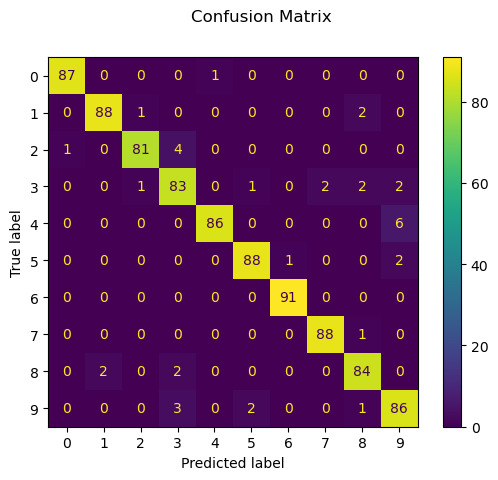

In [107]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [108]:
clf = KNN(k=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
acc_k1 = np.sum(predictions == y_test)/ len(y_test)
print(acc_k1)

0.9610678531701891


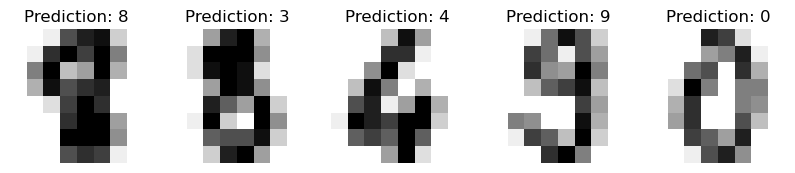

In [109]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [110]:
print(f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Classification report for classifier <__main__.KNN object at 0x000001EBAE54F7C0>:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.96      0.97      0.96        91
           2       0.99      0.97      0.98        86
           3       0.91      0.92      0.92        91
           4       0.99      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.99      0.99      0.99        89
           8       0.94      0.92      0.93        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 83  2  0  0  0  0  0  0]
 [ 0  0  0 84  0  2  0  1  2  2]
 [ 0  0  0  0 87  0  0  0  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  4  0  2  0  0  0  0 81  1]
 [ 0  0  0  4  0  2  0  0  0 86]]


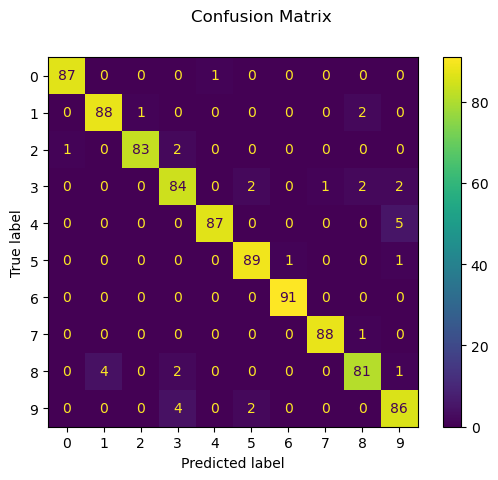

In [111]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [112]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
acc_k5 = np.sum(predictions == y_test)/ len(y_test)
print(acc_k5)

0.9543937708565072


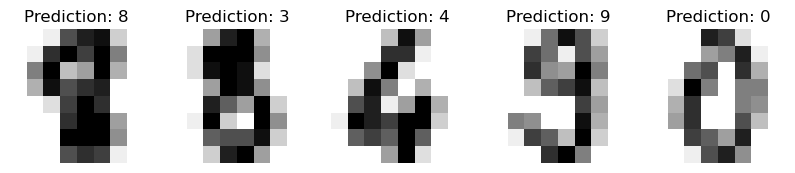

In [113]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [114]:
print(f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Classification report for classifier <__main__.KNN object at 0x000001EBAE757D00>:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.96      0.97      0.96        91
           2       0.96      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.93      0.97        92
           5       0.97      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.94      0.91      0.92        88
           9       0.90      0.92      0.91        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899




Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  1  0  3  3  1]
 [ 0  0  0  0 86  0  0  1  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  4  1  1  0  0  0  1 80  1]
 [ 0  0  0  4  0  2  0  0  1 85]]


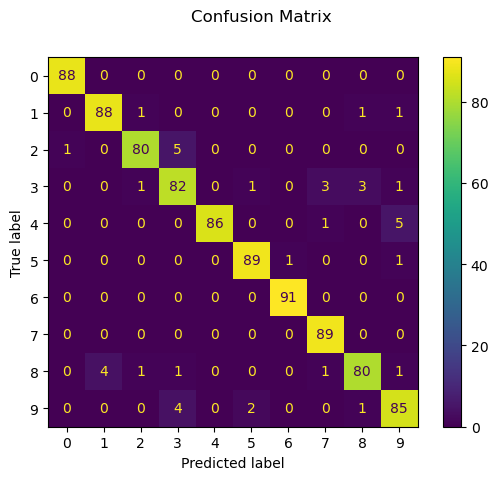

In [115]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [116]:
clf = KNN(k=100)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
acc_k100 = np.sum(predictions == y_test)/ len(y_test)
print(acc_k100)

0.8798665183537263


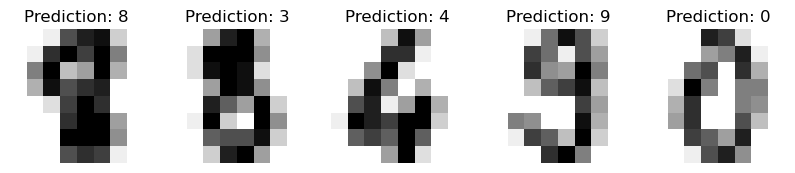

In [117]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [118]:
print(f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Classification report for classifier <__main__.KNN object at 0x000001EBAD216D00>:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        88
           1       0.96      0.73      0.83        91
           2       0.86      0.86      0.86        86
           3       0.73      0.88      0.80        91
           4       0.99      0.92      0.96        92
           5       0.87      0.85      0.86        91
           6       0.96      0.99      0.97        91
           7       0.90      0.99      0.94        89
           8       0.92      0.74      0.82        88
           9       0.77      0.86      0.81        92

    accuracy                           0.88       899
   macro avg       0.89      0.88      0.88       899
weighted avg       0.89      0.88      0.88       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 66  9  5  0  1  0  0  1  9]
 [ 1  0 74 11  0  0  0  0  0  0]
 [ 0  0  0 80  0  2  0  5  3  1]
 [ 4  0  0  0 85  0  0  2  1  0]
 [ 0  0  0  1  0 77  3  0  0 10]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  1  0  0  0  0 88  0  0]
 [ 0  2  2  7  0  5  1  2 65  4]
 [ 1  0  0  6  0  4  0  1  1 79]]


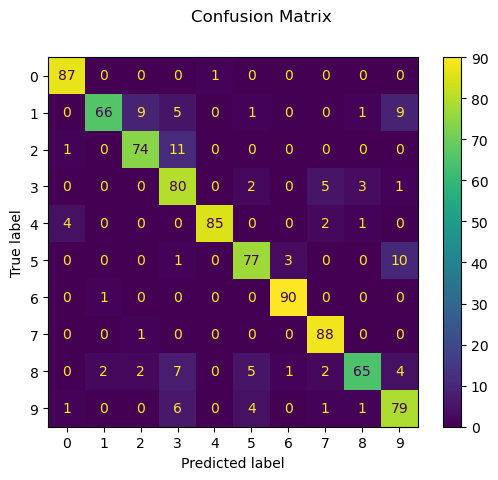

In [119]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [120]:
clf = KNN(k=500)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
acc_k500 = np.sum(predictions == y_test)/ len(y_test)
print(acc_k500)

0.5439377085650723


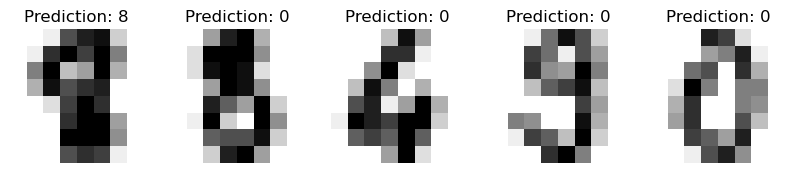

In [121]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predictions):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [122]:
print(f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)

Classification report for classifier <__main__.KNN object at 0x000001EBAD319AC0>:
              precision    recall  f1-score   support

           0       0.64      0.98      0.77        88
           1       0.86      0.07      0.12        91
           2       0.40      0.28      0.33        86
           3       0.32      0.88      0.47        91
           4       0.74      0.46      0.56        92
           5       0.71      0.59      0.65        91
           6       0.62      0.99      0.76        91
           7       0.88      0.67      0.76        89
           8       0.50      0.47      0.48        88
           9       0.29      0.07      0.11        92

    accuracy                           0.54       899
   macro avg       0.60      0.54      0.50       899
weighted avg       0.60      0.54      0.50       899




Confusion matrix:
[[86  0  0  0  1  0  1  0  0  0]
 [ 2  6 27  8  8  0 13  0 17 10]
 [ 2  0 24 52  0  0  7  0  1  0]
 [ 1  0  1 80  0  2  0  3  4  0]
 [18  0  0  0 42  1 26  3  2  0]
 [ 9  0  0 20  0 54  5  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  3  3  4  2  0 60 17  0]
 [ 6  0  5 15  2 12  4  1 41  2]
 [10  0  0 70  0  5  0  1  0  6]]


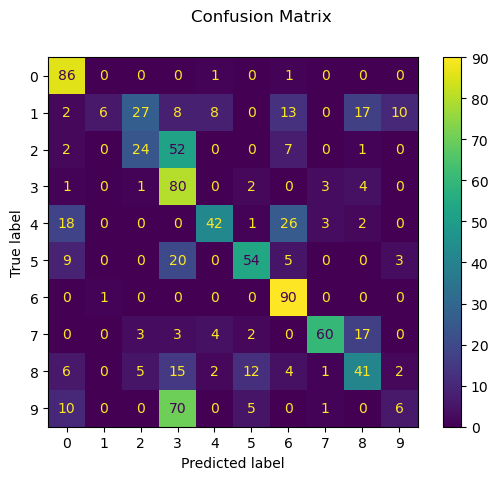

In [123]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [126]:
from tabulate import tabulate
print("Accuracy for chosen K:")
table = [['K=1','K=3','K=5','K=100','K=500'], [acc_k1,acc_k3,acc_k5,acc_k100,acc_k500]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

Accuracy for chosen K:
╒══════════╤══════════╤══════════╤══════════╤══════════╕
│      K=1 │      K=3 │      K=5 │    K=100 │    K=500 │
╞══════════╪══════════╪══════════╪══════════╪══════════╡
│ 0.961068 │ 0.958843 │ 0.954394 │ 0.879867 │ 0.543938 │
╘══════════╧══════════╧══════════╧══════════╧══════════╛


In [ ]:
#These results match my expectations for K values given the image is 8x8